## Análise dos Dados do preço do petróleo Brent


### O petróleo Brent é uma classificação de petróleo extraído do Mar do Norte. Assim como o petróleo West Texas Intermediate (WTI), o petróleo Brent é um dos principais tipos de petróleo cru negociados no mercado internacional. Ambos são usado como referência para o preço do petróleo em todo o mundo e amplamente negociados em mercados de futuros.



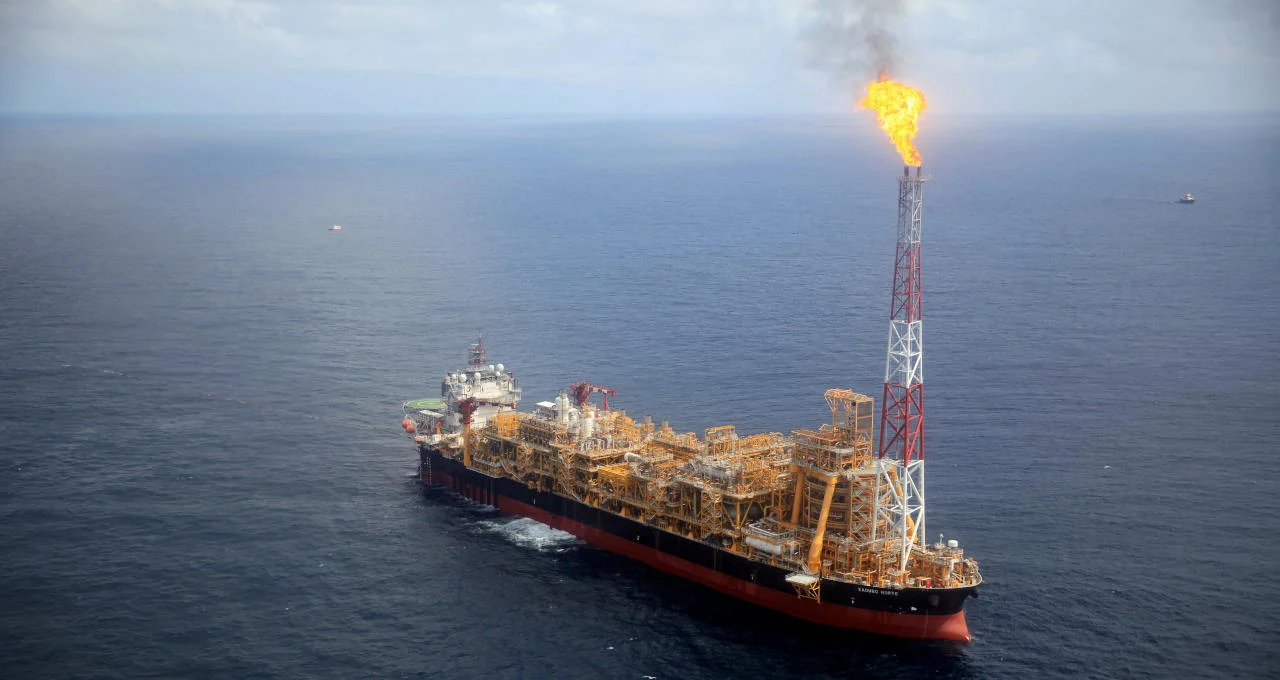

Fonte de dados: site do ipea. http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view

Nessa base apenas contempla duas colunas:


*   Data
*   Preço (em US$)



### Um grande cliente do segmento pediu para que a consultoria desenvolvesse um dashboard interativo para gerar insights relevantes para tomada de decisão. Além disso, solicitaram que fosse desenvolvido um modelo de Machine Learning para fazer o forecasting do preço do petróleo.
 <br/>
 <br/>Nosso Objetivo é:<br/>
<br/>
• Criar um dashboard interativo com ferramentas à sua escolha.<br/><br/>
• Seu dashboard deve fazer parte de um storytelling que traga insights relevantes sobre a variação do preço do petróleo, como situações geopolíticas, crises econômicas, demanda global por energia e etc. Isso pode te ajudar com seu modelo.<br/><br/>• É obrigatório que você traga pelo menos 4 (quatro) insights neste desafio.<br/><br/>
• Criar um modelo de Machine Learning que faça a previsão do preço do petróleo diariamente (lembre-se de time series). Esse modelo deve estar contemplado em seu storytelling e deve conter o código que você trabalhou, analisando as performances do modelo.<br/><br/>
• Criar um plano para fazer o deploy em produção do modelo, com as ferramentas que são necessárias.<br/><br/>
• Faça um MVP do seu modelo em produção utilizando o Streamlit.
<br/>
Quando abrimos as tabelas nos deparamos que cada semestre possui uma quantidade muito grande de dados, logo juntas 5 anos (10 tabelas) fica difícil!<br/>
<br/>

# 1 - **Coleta de Dados**

In [ ]:
#manipulacao de dados
import pandas as pd

In [ ]:
df = pd.read_excel('/content/Base Tech 1.xlsx')

In [ ]:
df.head()

,Data Rf,preco petroleo bruto
0,2023-12-29,77.69
1,2023-12-28,79.04
2,2023-12-27,80.97
3,2023-12-26,80.23
4,2023-12-22,80.23


# 2 - Analise exploratória dos dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data Rf               1596 non-null   datetime64[ns]
 1   preco petroleo bruto  1596 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 25.1 KB


In [ ]:
df.shape

(1596, 2)

In [ ]:
df.isnull().sum()

,0
Data Rf,0
preco petroleo bruto,0


In [ ]:
df.describe()

,Data Rf,preco petroleo bruto
count,1596,1596.000000
mean,2020-11-19 21:43:45.563909888,71.760896
min,2018-01-01 00:00:00,9.120000
25%,2019-04-23 18:00:00,62.110000
50%,2020-11-04 12:00:00,71.940000
75%,2022-06-03 18:00:00,82.347500
max,2023-12-29 00:00:00,133.180000
std,NaN,19.736734


In [ ]:
# separar coluna Data Rf em ano e mes para analise

df['ano'] = df['Data Rf'].dt.year
df['mes'] = df['Data Rf'].dt.month

In [ ]:
df.describe()

,Data Rf,preco petroleo bruto,ano,mes
count,1596,1596.000000,1596.000000,1596.00000
mean,2020-11-19 21:43:45.563909888,71.760896,2020.392857,6.45802
min,2018-01-01 00:00:00,9.120000,2018.000000,1.00000
25%,2019-04-23 18:00:00,62.110000,2019.000000,3.00000
50%,2020-11-04 12:00:00,71.940000,2020.000000,6.50000
75%,2022-06-03 18:00:00,82.347500,2022.000000,9.00000
max,2023-12-29 00:00:00,133.180000,2023.000000,12.00000
std,NaN,19.736734,1.736692,3.44870


In [ ]:
df.head()

,Data Rf,preco petroleo bruto,ano,mes
0,2023-12-29,77.69,2023,12
1,2023-12-28,79.04,2023,12
2,2023-12-27,80.97,2023,12
3,2023-12-26,80.23,2023,12
4,2023-12-22,80.23,2023,12


In [ ]:
df.shape

(1596, 4)

In [ ]:
df.describe().round(2)

,Data Rf,preco petroleo bruto,ano,mes
count,1596,1596.00,1596.00,1596.00
mean,2020-11-19 21:43:45.563909888,71.76,2020.39,6.46
min,2018-01-01 00:00:00,9.12,2018.00,1.00
25%,2019-04-23 18:00:00,62.11,2019.00,3.00
50%,2020-11-04 12:00:00,71.94,2020.00,6.50
75%,2022-06-03 18:00:00,82.35,2022.00,9.00
max,2023-12-29 00:00:00,133.18,2023.00,12.00
std,NaN,19.74,1.74,3.45


In [ ]:
#Visualizando os valores únicos - estamos analisando do ano de 2018 a 2023 somente para alimentar o modelo, o ano de 2024 será um comparativo
print(f'Os anos da Base: {df.ano.unique()}')

Os anos da Base: [2023 2022 2021 2020 2019 2018]


In [ ]:
df_preco_anos = df.groupby(['ano']).agg(['min', 'max', 'mean']).round(2)

In [ ]:
df_preco_anos

Data Rf                                          preco petroleo bruto  \
            min        max                          mean                  min   
ano                                                                             
2018 2018-01-01 2018-12-29 2018-06-26 21:01:08.789808896                50.57   
2019 2019-01-02 2019-12-31 2019-06-27 06:16:21.818181888                53.23   
2020 2020-01-02 2020-12-31 2020-06-30 22:41:33.385213952                 9.12   
2021 2021-01-04 2021-12-31 2021-07-03 13:13:42.047244032                50.37   
2022 2022-01-03 2022-12-30 2022-07-02 00:16:52.500000000                76.02   
2023 2023-01-02 2023-12-29 2023-06-29 09:05:01.195219200                71.03   

                     mes            
         max    mean min max  mean  
ano                                 
2018   86.07   71.29   1  12  6.36  
2019   74.94   64.14   1  12  6.38  
2020   70.25   41.71   1  12  6.49  
2021   85.76   70.85   1  12  6.58  
2022  133.18  100.88   1  12  6.53  
2023   97.10   82.36   1  12  6.43

In [ ]:
df_preco_anos_meses = df.groupby(['ano', 'mes']).agg(['min', 'max', 'mean']).round(2)

In [ ]:
df_preco_anos_meses

Data Rf                                           \
                min        max                          mean   
ano  mes                                                       
2018 1   2018-01-01 2018-01-31 2018-01-16 00:00:00.000000000   
     2   2018-02-01 2018-02-28 2018-02-14 02:40:00.000000000   
     3   2018-03-01 2018-03-30 2018-03-15 15:41:32.307692288   
     4   2018-04-03 2018-04-30 2018-04-16 04:00:00.000000000   
     5   2018-05-01 2018-05-31 2018-05-15 11:04:36.923076864   
...             ...        ...                           ...   
2023 8   2023-08-01 2023-08-31 2023-08-15 10:54:32.727272704   
     9   2023-09-04 2023-09-29 2023-09-16 12:00:00.000000000   
     10  2023-10-02 2023-10-30 2023-10-15 05:42:51.428571392   
     11  2023-11-06 2023-11-30 2023-11-17 20:12:37.894736896   
     12  2023-12-01 2023-12-29 2023-12-15 07:12:00.000000000   

         preco petroleo bruto                
                          min    max   mean  
ano  mes                                     
2018 1                  66.65  71.08  68.93  
     2                  61.94  68.60  65.46  
     3                  63.61  69.03  66.01  
     4                  66.04  75.92  71.91  
     5                  73.14  80.42  76.79  
...                       ...    ...    ...  
2023 8                  83.94  89.31  86.15  
     9                  90.42  97.10  93.90  
     10                 87.58  94.46  90.78  
     11                 77.73  87.31  82.17  
     12                 74.11  81.10  77.76  

[72 rows x 6 columns]

#Visualização de Dados

In [ ]:
#graficos
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.rename(columns={'preco petroleo bruto': 'preco_em_dolar'}, inplace=True)

In [ ]:
df.rename(columns={'Data Rf': 'data'}, inplace=True)

In [ ]:
df.head()

,data,preco_em_dolar,ano,mes
0,2023-12-29,77.69,2023,12
1,2023-12-28,79.04,2023,12
2,2023-12-27,80.97,2023,12
3,2023-12-26,80.23,2023,12
4,2023-12-22,80.23,2023,12


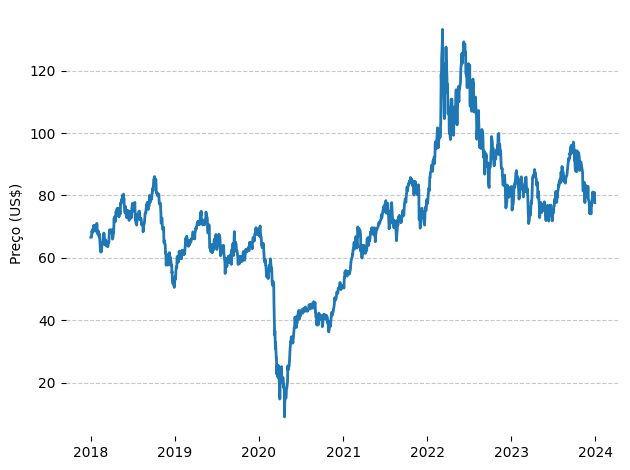

In [ ]:
ax = sns.lineplot(data=df, x="data", y='preco_em_dolar')

# Set labels
ax.set(ylabel='Preço (US$)')
ax.set(xlabel='')  # No x-axis label

# Enhancements:
#ax.set_title('Preço ao Longo do Tempo', fontsize=14) # Add a title
#plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability if needed (adjust ha if necessary)
sns.despine(left=True, bottom=True) # Remove the top and right spines for a cleaner look

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the line style (optional)
ax.lines[0].set_linewidth(2) # Make the line thicker

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

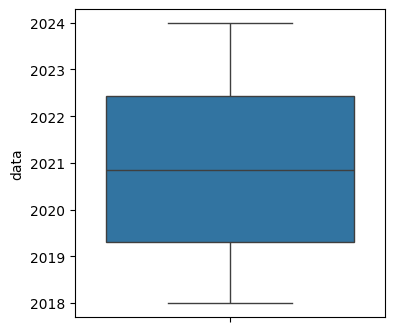

In [ ]:
ax = sns.boxplot(y='data', data=df)
ax.figure.set_size_inches(4,4)

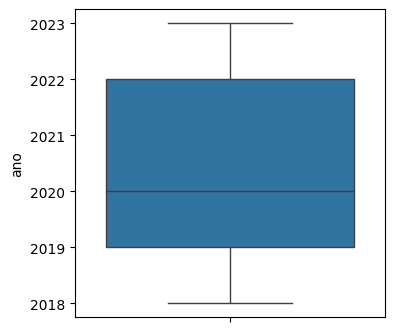

In [ ]:
ax = sns.boxplot(y='ano', data=df)
ax.figure.set_size_inches(4,4)

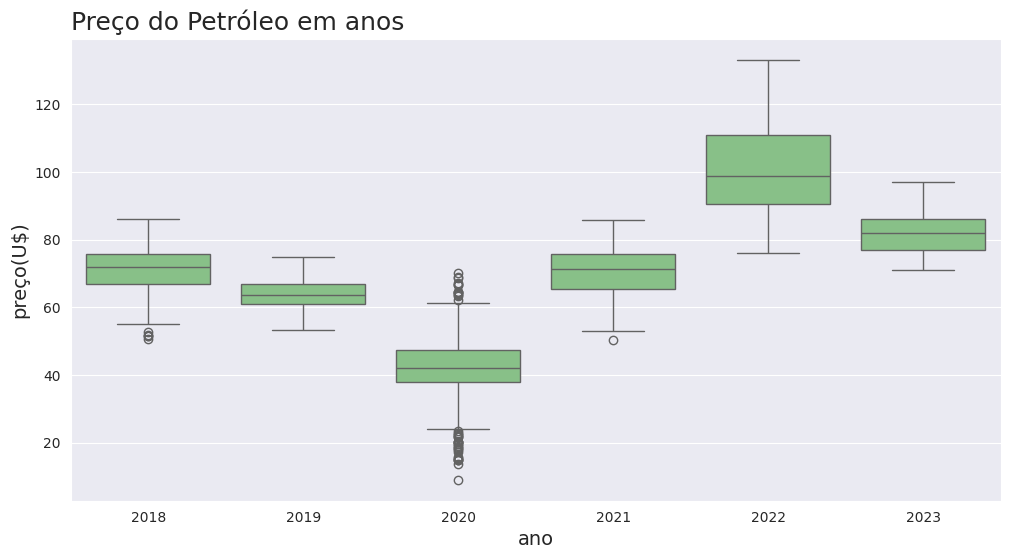

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.boxplot(x='ano', y= 'preco_em_dolar', data=df)
ax.figure.set_size_inches(12,6)
ax.set_title('Preço do Petróleo em anos', loc = 'left', fontsize = 18)
ax.set_xlabel('ano', fontsize = 14)
ax.set_ylabel('preço(U$)', fontsize = 14);

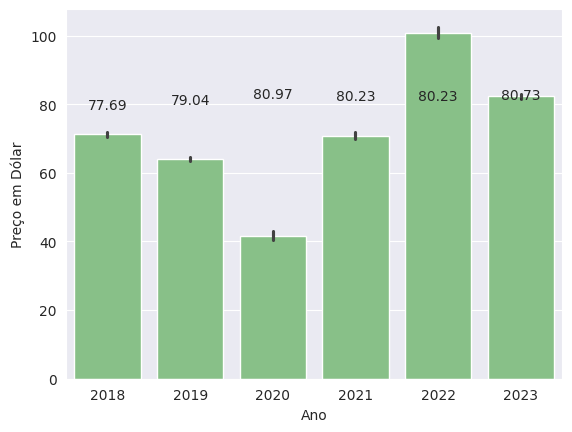

In [ ]:
sns.barplot(x='ano', y='preco_em_dolar', data=df)

plt.xlabel('Ano')
plt.ylabel('Preço em Dólar')

for index, row in df.iterrows():
    plt.annotate(row['preco_em_dolar'], xy=(index, row['preco_em_dolar']), ha='center', va='bottom')

plt.show()

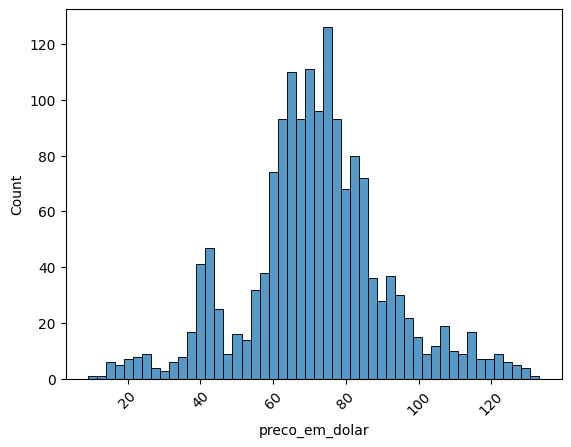

In [ ]:

sns.histplot(data=df, x='preco_em_dolar', bins=50)
plt.xticks(rotation=45)
plt.show()

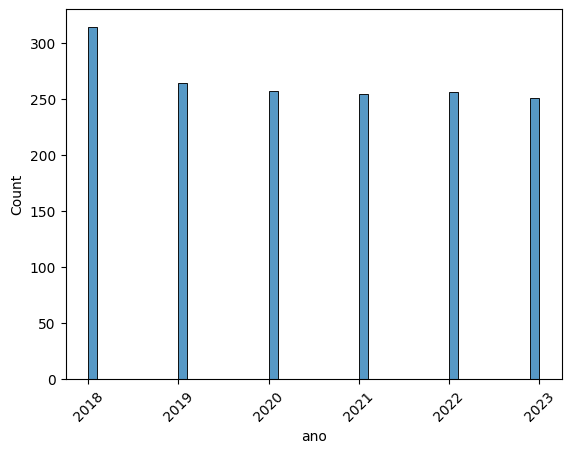

In [ ]:
sns.histplot(data=df, x='ano', bins=50)
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

In [ ]:
def plot_series(dataframe, series, same_ax=True,
                title=None, xlabel=None, ylabel=None,
                figsize=(15, 6), color='#1f3979',
                grid=True, legend=False):
    ''' Plots one or multiple time series.

    Parameters
    ----------
    dataframe : pandas.DataFrame
        Dataframe containing the time series.
    series : str or list
        Name of the column(s) to be plotted.
    same_ax : bool, optional
        If True, plots all series in the same axis. The default is True.
    title : str
        Title of the plot.
    xlabel : str
        Label of the x axis.
    ylabel : str
        Label of the y axis.
    figsize : tuple, optional
        Figure size. The default is (15, 6).
    color : str, optional
        Color of the plot. The default is '#1f3979'.
    grid : bool, optional
        If True, shows grid. The default is True.
    legend : bool, optional
        If True, shows legend. The default is False.

    '''
    # if series is a string, convert to list
    if type(series) == str:
        series = [series]

    # plot in the same axis
    if same_ax:
        plt.figure(figsize=figsize)
        for serie in series:
            plt.plot(dataframe[serie], color=color, label=serie)
        plt.title(title, fontsize=20)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        if grid:
            plt.grid(True, alpha=0.5, linestyle='--')
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)
        plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))
        plt.xticks(fontsize=12, rotation=30)
        plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
        plt.yticks(fontsize=12)
        if legend:
            plt.legend(loc='best')
        plt.tight_layout()
        plt.show()
    # plot in individual subplots
    else:
        fig, ax = plt.subplots(len(series), 1, figsize=(15, 5*len(series)))
        for i, serie in enumerate(series):
            ax[i].plot(dataframe[serie], color=color)
            ax[i].set_title(serie)
            ax[i].spines['right'].set_visible(False)
            ax[i].spines['top'].set_visible(False)
            ax[i].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
            ax[i].xaxis.set_major_locator(mdates.YearLocator(1))
            ax[i].tick_params(axis='x', labelrotation=30)
            if grid:
                ax[i].grid(True, alpha=0.5, linestyle='--')
        plt.tight_layout()
        plt.show()


#Utilizando a biblioteca do IPEA
### IPEA - Instituto de Pesquisa Econômica Aplicada


In [ ]:
!pip install ipeadatapy
import ipeadatapy as ip

In [ ]:
# código da tabela com preços do brent no IPEA (EIA366_PBRENT366)

ip.timeseries('EIA366_PBRENT366')


,CODE,RAW DATE,DAY,MONTH,YEAR,VALUE (US$)
DATE,,,,,,
1986-01-04,EIA366_PBRENT366,1986-01-04T00:00:00-02:00,4,1,1986,NaN
1986-01-05,EIA366_PBRENT366,1986-01-05T00:00:00-02:00,5,1,1986,NaN
1986-01-06,EIA366_PBRENT366,1986-01-06T00:00:00-02:00,6,1,1986,NaN
1986-01-07,EIA366_PBRENT366,1986-01-07T00:00:00-02:00,7,1,1986,NaN
1986-01-08,EIA366_PBRENT366,1986-01-08T00:00:00-02:00,8,1,1986,NaN
...,...,...,...,...,...,...
2024-10-29,EIA366_PBRENT366,2024-10-29T00:00:00-03:00,29,10,2024,71.09
2024-10-30,EIA366_PBRENT366,2024-10-30T00:00:00-03:00,30,10,2024,73.21
2024-10-31,EIA366_PBRENT366,2024-10-31T00:00:00-03:00,31,10,2024,73.25


In [ ]:
df_brent = ip.timeseries('EIA366_PBRENT366')[['VALUE (US$)']]

In [ ]:
df_brent.head()

,value
date,
1986-01-04,NaN
1986-01-05,NaN
1986-01-06,NaN
1986-01-07,NaN
1986-01-08,NaN


In [ ]:
df_brent.columns = ['value']


In [ ]:
df_brent.index.name = 'date'


In [ ]:
df_brent.shape

(13562, 1)

In [ ]:
df_brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13562 entries, 1986-01-04 to 2024-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   11292 non-null  float64
dtypes: float64(1)
memory usage: 211.9 KB


In [ ]:
df_brent.describe()

,value
count,11292.000000
mean,53.311948
std,33.164669
min,9.100000
25%,20.610000
50%,48.885000
75%,76.810000
max,143.950000


In [ ]:
df_brent.columns

Index(['value', 'ano', 'mes'], dtype='object')

In [ ]:
# separar coluna Data Rf em ano e mes para analise

df_brent['ano'] = df_brent.index.year
df_brent['mes'] = df_brent.index.month

In [ ]:
df_brent.tail()

,value,ano,mes
date,,,
2024-10-29,71.09,2024,10
2024-10-30,73.21,2024,10
2024-10-31,73.25,2024,10
2024-11-01,73.63,2024,11
2024-11-04,74.89,2024,11


In [ ]:
df_brent.describe()

,value,ano,mes
count,11292.000000,13562.000000,13562.000000
mean,53.311948,2004.169960,6.500737
std,33.164669,10.865384,3.443332
min,9.100000,1986.000000,1.000000
25%,20.610000,1995.000000,4.000000
50%,48.885000,2004.000000,7.000000
75%,76.810000,2013.000000,9.000000
max,143.950000,2024.000000,12.000000


In [ ]:
# a base de dados do IPEA traz de 1986 a 2024, porem existem dados nulos no primeiro ano

df_brent.isnull().sum()

,0
value,2270
ano,0
mes,0


In [ ]:
# last not nan day
last_day_ipea = df_brent.query('value.notna()').index.max()

# first not nan day
first_day_ipea = df_brent.query('value.notna()').index.min()

print(f'First day: {first_day_ipea}')
print(f'Last day: {last_day_ipea}')

df_brent_datas_validas = df_brent.loc[first_day_ipea:last_day_ipea]
df_brent_datas_validas

First day: 1987-05-20 00:00:00
Last day: 2024-11-12 00:00:00


,value,ano,mes
date,,,
1987-05-20,18.63,1987,5
1987-05-21,18.45,1987,5
1987-05-22,18.55,1987,5
1987-05-23,NaN,1987,5
1987-05-24,NaN,1987,5
...,...,...,...
2024-11-06,76.52,2024,11
2024-11-07,75.73,2024,11
2024-11-08,74.04,2024,11


In [ ]:
df_brent_datas_validas.shape

(13063, 1)

In [ ]:
df_brent_datas_validas.isnull().sum()

,0
value,1771
ano,0
mes,0


In [ ]:
df_brent_datas_validas.describe()

,value,ano,mes
count,11292.000000,13063.000000,13063.000000
mean,53.311948,2004.853479,6.537089
std,33.164669,10.481428,3.438523
min,9.100000,1987.000000,1.000000
25%,20.610000,1996.000000,4.000000
50%,48.885000,2005.000000,7.000000
75%,76.810000,2014.000000,10.000000
max,143.950000,2024.000000,12.000000


In [ ]:
df_brent_datas_validas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13063 entries, 1987-05-20 to 2024-11-04
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   11292 non-null  float64
dtypes: float64(1)
memory usage: 204.1 KB


In [ ]:
df_brent_datas_validas.head()

,value
date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-23,NaN
1987-05-24,NaN


In [ ]:
df_brent_datas_validas.tail()

,value
date,
2024-10-29,71.09
2024-10-30,73.21
2024-10-31,73.25
2024-11-01,73.63
2024-11-04,74.89


In [ ]:
df_brent_datas_validas.describe()

,value
count,11292.000000
mean,53.311948
std,33.164669
min,9.100000
25%,20.610000
50%,48.885000
75%,76.810000
max,143.950000


In [ ]:
# separar o df dos anos 2014 a 2024
df_resumido = df_brent_datas_validas.query('ano >= 2014 & ano <= 2024')

In [ ]:
df_resumido.head()

,value,ano,mes
date,,,
2014-01-01,NaN,2014,1
2014-01-02,107.94,2014,1
2014-01-03,110.47,2014,1
2014-01-04,109.95,2014,1
2014-01-05,NaN,2014,1


In [ ]:
df_resumido.tail()

,value,ano,mes
date,,,
2024-11-06,76.52,2024,11
2024-11-07,75.73,2024,11
2024-11-08,74.04,2024,11
2024-11-11,72.19,2024,11
2024-11-12,72.56,2024,11


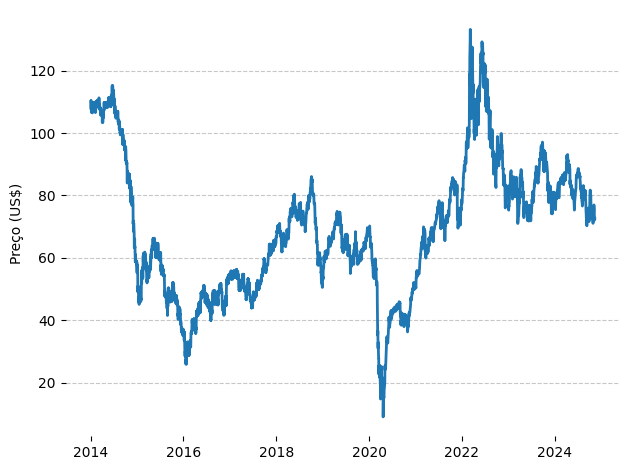

In [ ]:
ax = sns.lineplot(data=df_resumido, x="date", y='value')

# Set labels
ax.set(ylabel='Preço (US$)')
ax.set(xlabel='')  # No x-axis label

# Enhancements:
#ax.set_title('Preço ao Longo do Tempo', fontsize=14) # Add a title
#plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability if needed (adjust ha if necessary)
sns.despine(left=True, bottom=True) # Remove the top and right spines for a cleaner look

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize the line style (optional)
ax.lines[0].set_linewidth(2) # Make the line thicker

# Show the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
df_brent_datas_validas.columns

Index(['value', 'ano', 'mes'], dtype='object')

#plotando de acordo com os insights

In [ ]:
df_resumido['value'].max()

133.18

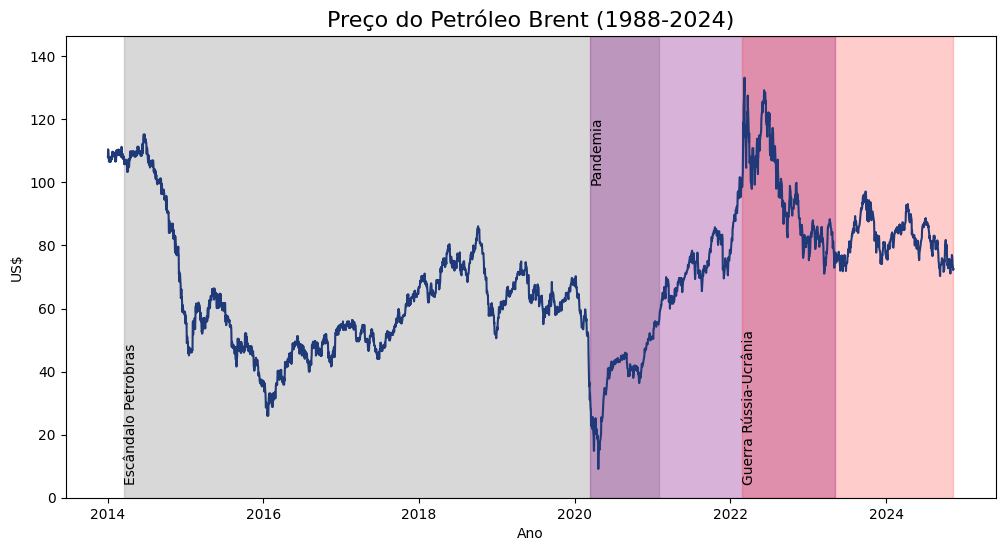

In [ ]:
# plotar linha do tempo
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_resumido, x=df_resumido.index, y='value', ax=ax, color='#1f3979')
# marcar 2006 em área como descoberta pré-sal
#ax.axvspan('2006-01-01', '2006-12-31', color='grey', alpha=0.3)
# texto para descoberta pré-sal
#ax.text(pd.to_datetime('2006-01-01'), 100, 'Descoberta Pré-Sal', rotation=90)
# adicionar grande recessão
#ax.axvspan('2007-12-01', '2009-06-30', color='grey', alpha=0.3)
# texto para grande recessão
#ax.text(pd.to_datetime('2007-12-01'), 5, 'Grande Recessão', rotation=90)

# adicionar escândalo Petrobras
ax.axvspan('2014-03-17', '2021-02-01', color='grey', alpha=0.3)
# texto para escândalo Petrobras
ax.text(pd.to_datetime('2014-03-17'), 5, 'Escândalo Petrobras', rotation=90)
# adicionar pandemia
ax.axvspan('2020-03-11', '2023-05-05', color='purple', alpha=0.3)
# texto para pandemia
ax.text(pd.to_datetime('2020-03-11'), 100, 'Pandemia', rotation=90)
# adicionar guerra Rússia-Ucrânia (verificar data)
ax.axvspan('2022-02-24', df_resumido.index.max(), color='red', alpha=0.2)
# texto para guerra Rússia-Ucrânia
ax.text(pd.to_datetime('2022-02-24'), 5, 'Guerra Rússia-Ucrânia', rotation=90)
# adicionar título
ax.set_title('Preço do Petróleo Brent (1988-2024)', fontsize=16)
# ylabel
ax.set_ylabel('US$')
# xlabel
ax.set_xlabel('Ano')
# y lim + 10%
ax.set_ylim(0, df_resumido['value'].max() * 1.10)
plt.show()

###Escândalo da Petrobras impactou o valor do petroleo Brent

<Axes: xlabel='date', ylabel='value'>

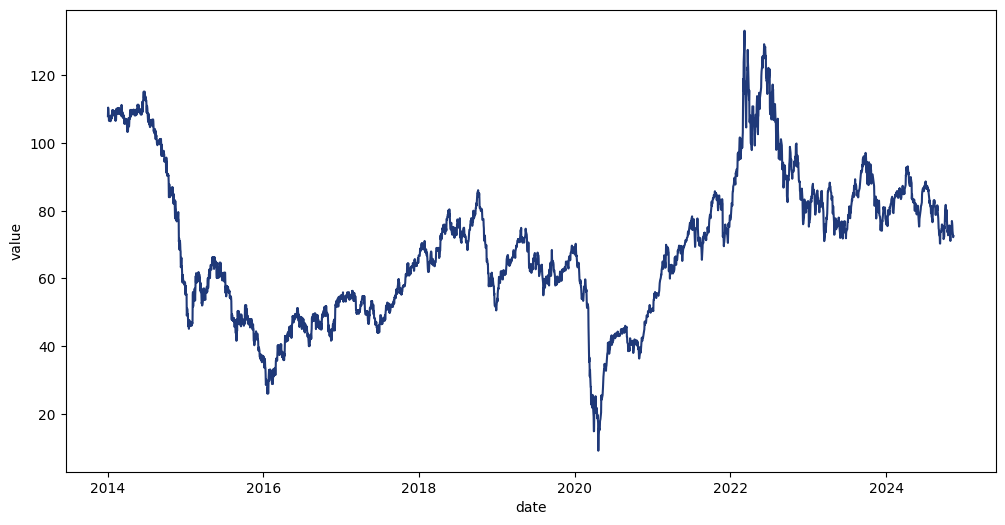

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_resumido, x=df_resumido.index, y='value', ax=ax, color='#1f3979')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

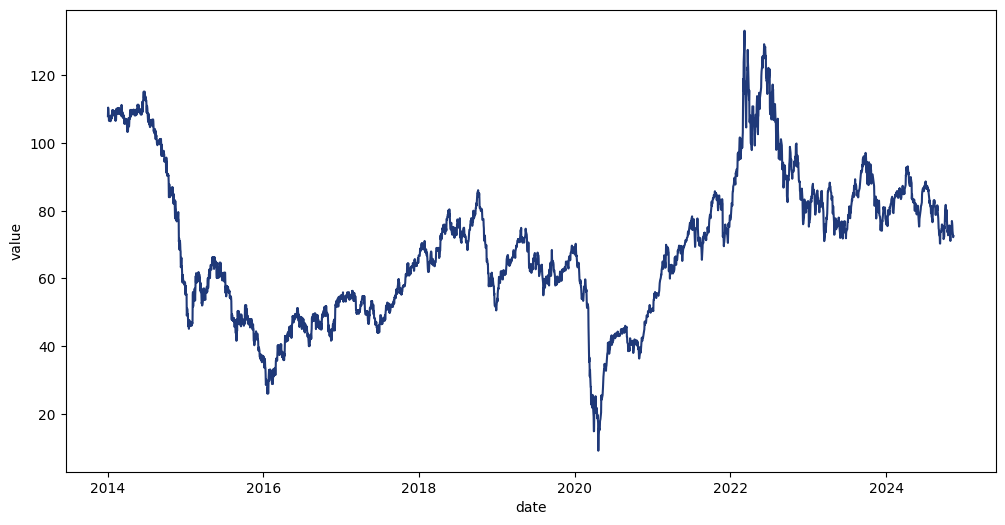

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=df_resumido, x=df_resumido.index, y='value', ax=ax, color='#1f3979')
# linha com mínima
ax.axhline(df_resumido.min()+5, linestyle='--', color='#A9336C')
ax.text(19500, df_resumido.min(), 'Mínima', color='#A9336C')
# linha com média
ax.axhline(df_resumido.mean()+5, linestyle='--', color='black')
ax.text(19500, df_resumido.mean(), 'Média', color='black')
# adicionar título
ax.set_title('Impacto da Pandemia no Preço do Petróleo Brent', fontsize=16)
# ylabel
ax.set_ylabel('US$')
# texto fora do plot:
# mínima do preço do petróleo: valor e data
min_value =df_resumido.min()
min_date = df_resumido.idxmin().strftime(r'%d/%m/%Y')
# texto com mínima do preço do petróleo
ax.text(21000, 140, f'Mínima do período:\n US${min_value:.2f} em {min_date}',
        fontsize=10)
# segundo menor valor
sec_min_value = df_resumido.query('date != @min_value')['value'].min()
sec_min_date = df_resumido.query('date != @min_value')['value'].idxmin().strftime(r'%d/%m/%Y')
ax.text(21000, 125, f'Segunda mínima do preço:\n US${sec_min_value:.2f} em {sec_min_date}',
        fontsize=10, color='#A9336C', fontweight='bold')
# texto com média do preço do petróleo
mean_value = df_resumido.mean()
ax.text(21000, 110, f'Média do preço:\n US${mean_value:.2f}', fontsize=10)
# xlabel
ax.set_xlabel('Ano')
plt.show()

In [ ]:
df_brent_datas_validas['value'].min()

9.1

In [ ]:
df_brent_datas_validas['value'].max()

143.95

<Axes: xlabel='date'>

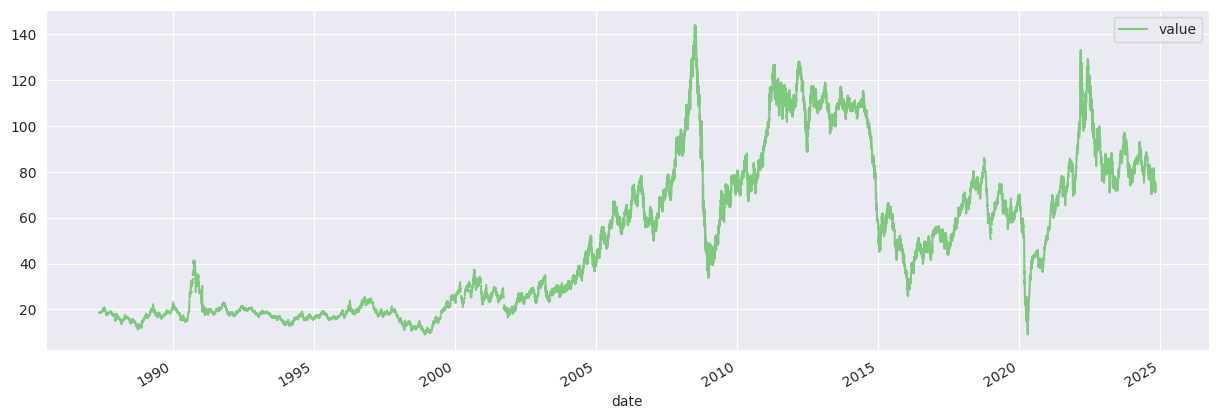

In [ ]:
df_brent_datas_validas.plot(figsize=(15,5))

<Axes: >

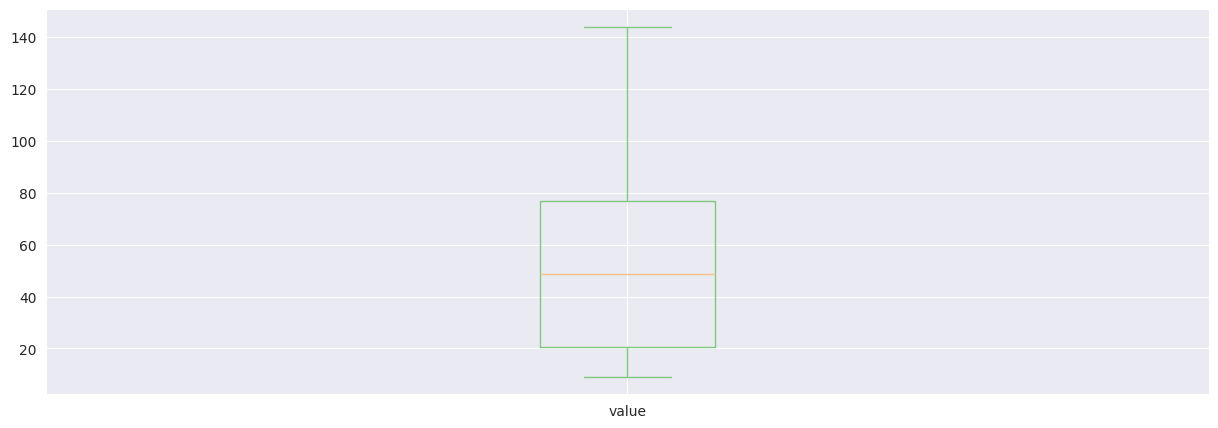

In [ ]:
df_brent_datas_validas.plot(figsize=(15,5), kind='box')

<Axes: ylabel='Frequency'>

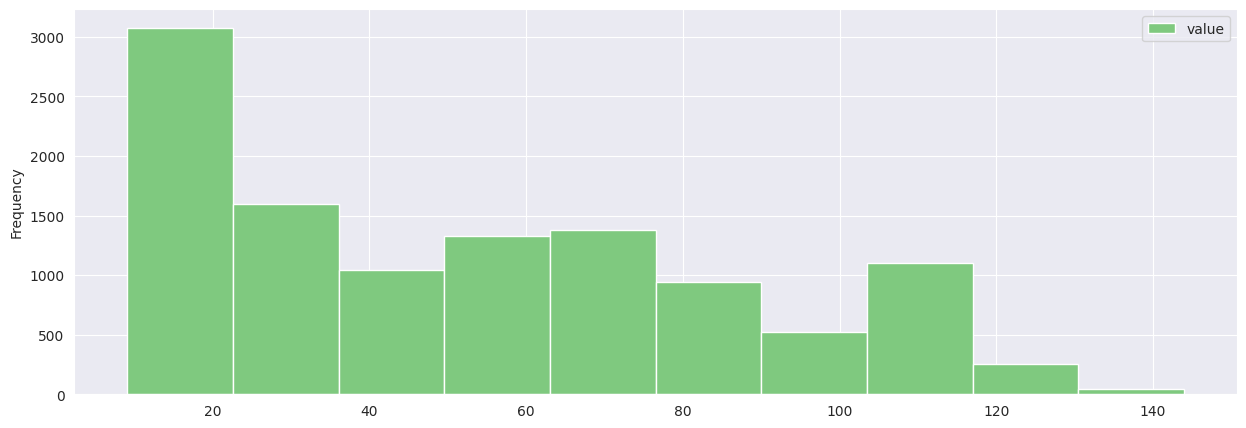

In [ ]:
df_brent_datas_validas.plot(figsize=(15,5), kind='hist')

<Axes: ylabel='Density'>

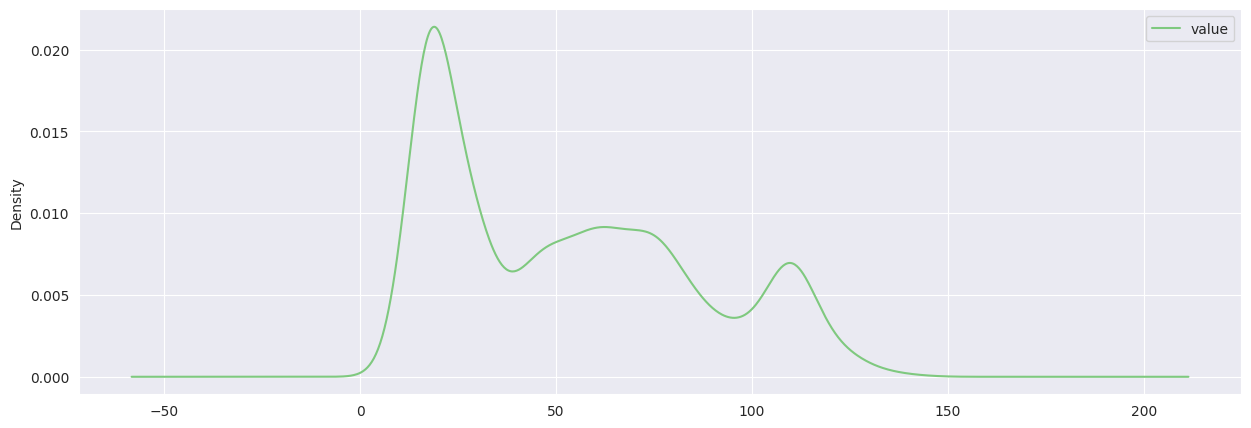

In [ ]:
df_brent_datas_validas.plot(figsize=(15,5), kind='kde')

<Axes: xlabel='date'>

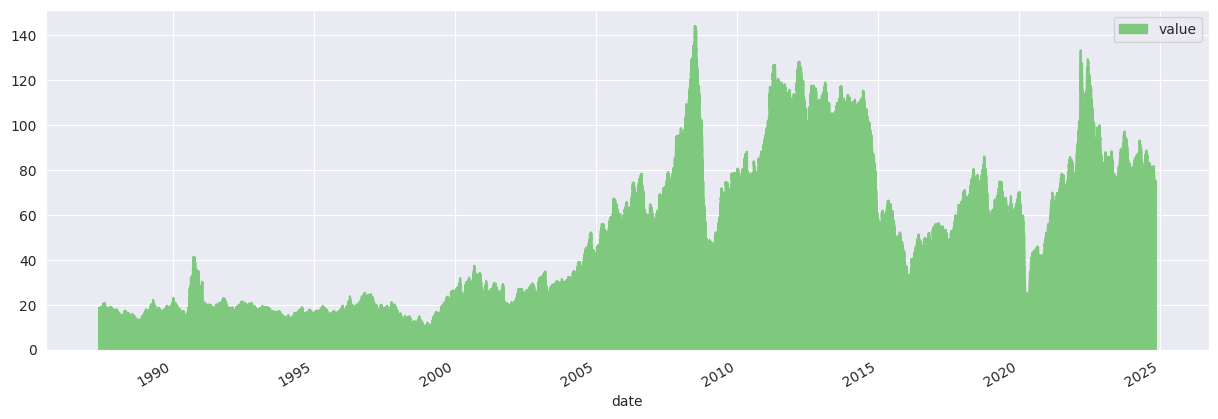

In [ ]:
df_brent_datas_validas.plot(figsize=(15,5), kind='area')

In [ ]:
df_brent_datas_validas.isnull().sum()

,0
value,1771


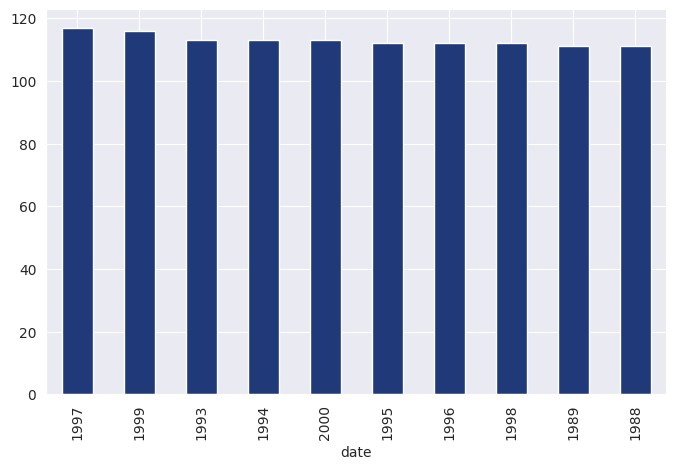

In [ ]:
# localização dos valores nulos por ano
df_brent_datas_validas[df_brent_datas_validas['value'].isnull()]\
    .index.year.value_counts().head(10)\
        .plot(kind='bar', figsize=(8, 5), color='#1f3979');

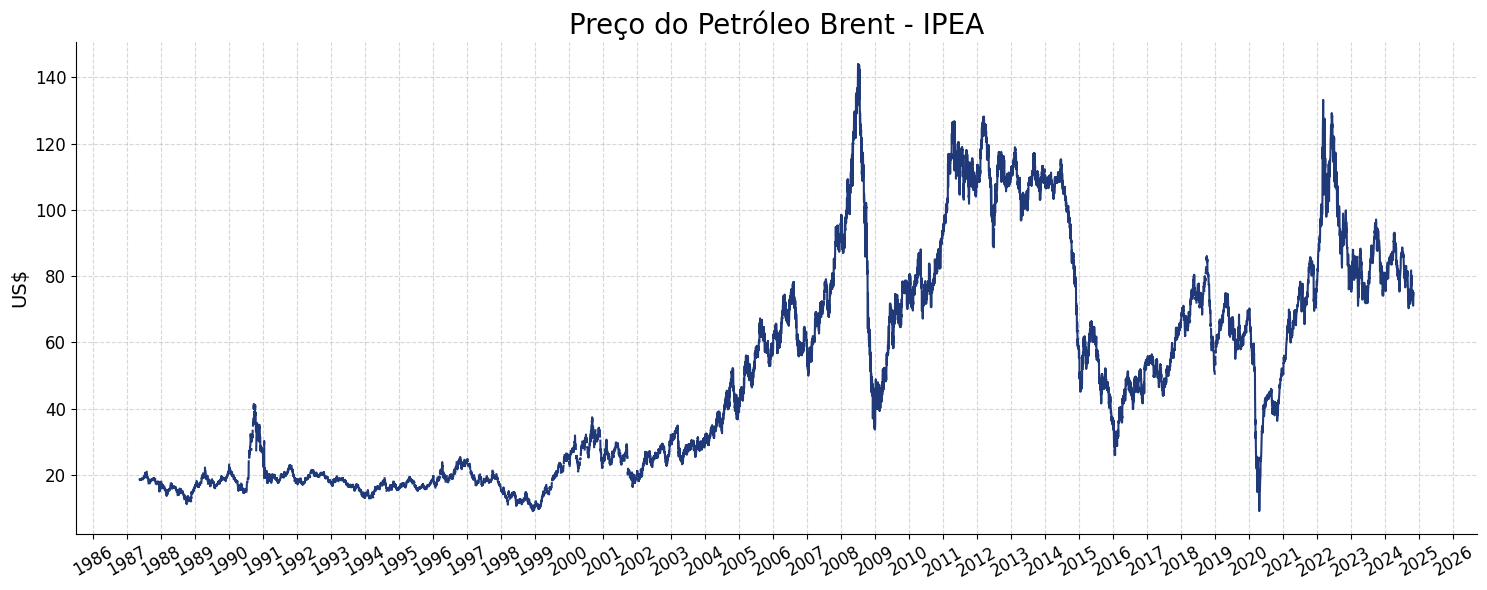

In [ ]:

plot_series(df_brent_datas_validas,
            'value',
            title='Preço do Petróleo Brent - IPEA',
            ylabel='US$')




*   A mínima do período data de 10 de Dezembro de 1998, com preço equivalente a US$9.10.

*   A segunda menor mínima ocorreu na Pandemia de COVID-19, em 21 de Abril de 2020, com preço em US$9.12.

*   Em 2008, o preço do barril de petróleo Brent atingiu o valor recorde de US143.95. Com a grande recessao, o preço caiu para 33.73 no mesmo ano. A variação agressiva foi de -326.78%.
*   As guerras entre EUA e Iraque (2003) e entre Rússia e Ucrânia (2022) também impactaram no preço do petróleo - por questões de oferta e demanda, dificuldades na produção e circulação de mercadorias, além da especulação do mercado.






# Análise de Série Temporal

**Referencias**

In [ ]:
Coletando dados do IPEADATA com Python https://analisemacro.com.br/economia/indicadores/coletando-dados-do-ipeadata-com-python/